In [ ]:
import pandas as pd
import seaborn as sns
# Load the Titanic dataset
df = sns. load_dataset( 'titanic')
# Preview the first few rows of the dataset
print(df.head())
# Check the shape of the dataset
print(f'Dataset contains {df.shape[0]} rows and {df. shape [1]} columns. ')
# Check data types and missing values
print(df.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Dataset contains 891 rows and 15 columns. 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ----------

**Data cleaning**
handle missing values and correct datatypes

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values [missing_values>0])

# Drop columns with a high number of missing values (e.g., 'deck')
df.drop(columns=['deck'], inplace=True)

# Fill missing values in 'age' with the median age
df[ 'age'].fillna(df['age' ].median(), inplace=True)

# Drop rows with missing 'embarked' values
df.dropna(subset=['embarked'], inplace=True)

# Correct data types if needed (example: 'sex' to category)
df ['sex'] = df[ 'sex'].astype('category')

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df['sex']

,sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


**step 3:Descriptive statistics**
summary statistics and distribution analysis

         survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.315152    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.984932    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
sex
male      577
female    312
Name: count, dtype: int64
The skewness of sex is 0.5080100783148638


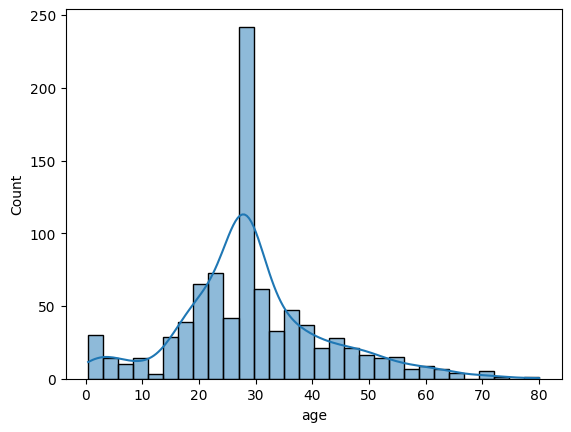

In [ ]:
# Summary statistics for numerical columns
print(df.describe())
# Value counts for categorical columns
print(df[ 'sex']. value_counts () )
# Distribution of 'age'
sns.histplot(df[ 'age'], kde=True)

print("The skewness of sex is", df['age'].skew())

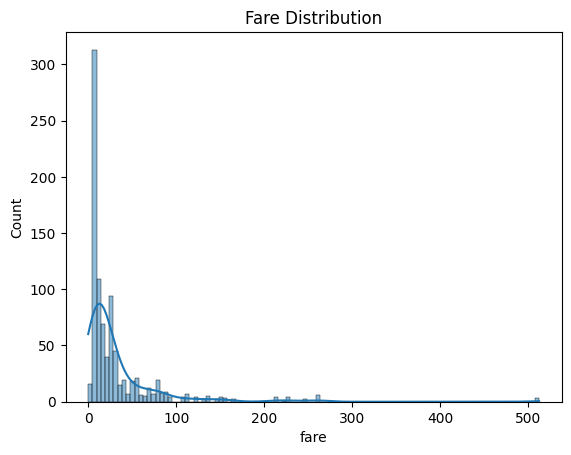

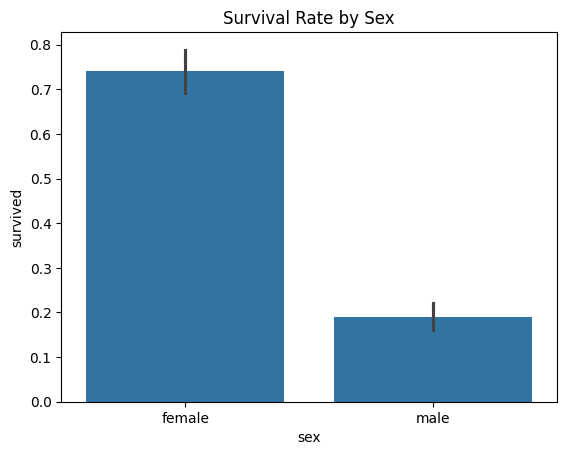

In [ ]:
import matplotlib.pyplot as plt
# Univariate analysis: Distribution of 'fare'
sns.histplot(df['fare'], kde=True)
plt.title('Fare Distribution')
plt. show()
# Bivariate analysis: Survival rate by 'sex"
sns. barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt. show()
# Multivariate analysis: Pair plot of numerical features

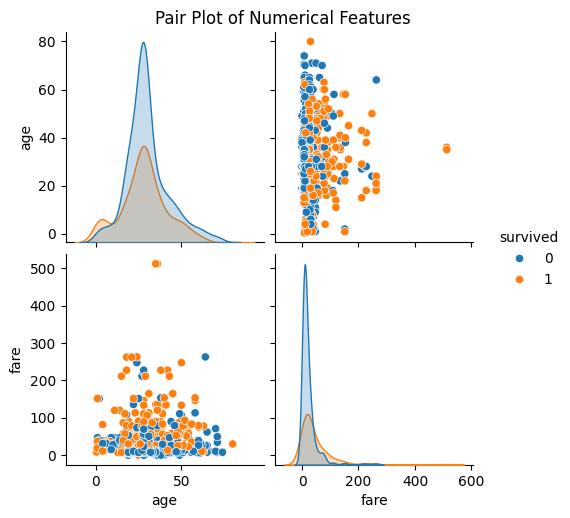

In [ ]:
# Multivariate analysis: Pair plot of numerical features
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['embarked' ] =labelencoder.fit_transform(df[ 'embarked' ])
df['sex'] = labelencoder.fit_transform(df['sex'])
df[ 'class'] = labelencoder.fit_transform(df['class' ])
df[ 'who'] = labelencoder.fit_transform(df[ 'who'])
df['adult_male']=labelencoder.fit_transform(df[ 'adult_male'])
df[ 'alive']=labelencoder.fit_transform(df['alive'])
df[ 'embark_town' ]=labelencoder.fit_transform(df['embark_town' ])
df['alone' ]=labelencoder.fit_transform(df['alone' ])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,2,1,1
888,0,3,0,28.0,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,0,1,1


In [ ]:
df.dtypes

,0
survived,int64
pclass,int64
sex,int64
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,int64
class,int64
who,int64


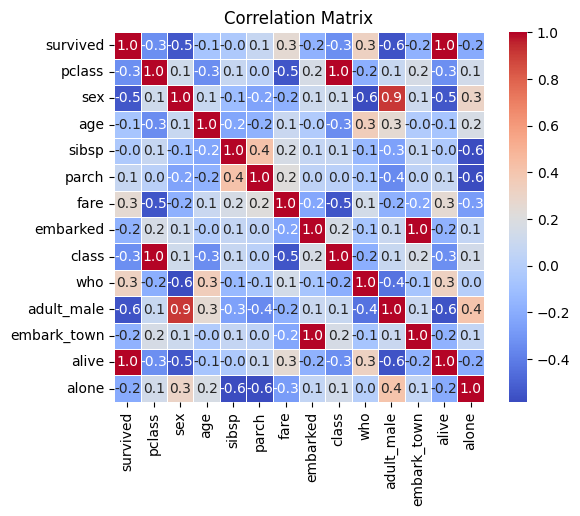

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='0.01f',annot_kws=None, linewidths=0.5, robust=True, square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
corr_matrix

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
survived,1.000000,-0.335549,-0.541585,-0.069822,-0.034040,0.083151,0.255290,-0.169718,-0.335549,0.323191,-0.555520,-0.169718,1.000000,-0.206207
pclass,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681,1.000000,-0.193029,0.090098,0.164681,-0.335549,0.138553
sex,-0.541585,0.127741,1.000000,0.086506,-0.116348,-0.247508,-0.179958,0.110320,0.127741,-0.638309,0.908250,0.110320,-0.541585,0.306985
age,-0.069822,-0.336512,0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.020933,-0.336512,0.347428,0.253491,-0.020933,-0.069822,0.169518
sibsp,-0.034040,0.081656,-0.116348,-0.232543,1.000000,0.414542,0.160887,0.068900,0.081656,-0.134887,-0.255401,0.068900,-0.034040,-0.584186
parch,0.083151,0.016824,-0.247508,-0.171485,0.414542,1.000000,0.217532,0.040449,0.016824,-0.054389,-0.351945,0.040449,0.083151,-0.583112
fare,0.255290,-0.548193,-0.179958,0.093707,0.160887,0.217532,1.000000,-0.226311,-0.548193,0.143849,-0.179851,-0.226311,0.255290,-0.274079
embarked,-0.169718,0.164681,0.110320,-0.020933,0.068900,0.040449,-0.226311,1.000000,0.164681,-0.066062,0.094347,1.000000,-0.169718,0.062532
class,-0.335549,1.000000,0.127741,-0.336512,0.081656,0.016824,-0.548193,0.164681,1.000000,-0.193029,0.090098,0.164681,-0.335549,0.138553
who,0.323191,-0.193029,-0.638309,0.347428,-0.134887,-0.054389,0.143849,-0.066062,-0.193029,1.000000,-0.435459,-0.066062,0.323191,0.004125


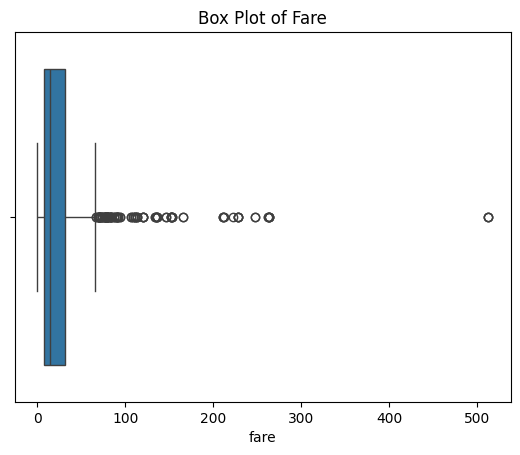

Number of outliers in fare: 20


In [ ]:
# Visual detection of outliers using a box plot
sns.boxplot(x=df['fare'])
plt.title('Box Plot of Fare')
plt. show()
# Z-score to detect outliers
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df['fare']))
outliers = df[z_scores > 3]
print(f'Number of outliers in fare: {outliers.shape[0]}')

# 7. Feature Engineering

In [ ]:
df['family_size']= df['sibsp']+df['parch']+1

# log transformation of fare to reduce skewness
df['log_fare']=np.log1p(df['fare'])

# One hot encoding
df=pd.get_dummies(df, columns=['embarked'], drop_first=True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_size,log_fare,embarked_1,embarked_2
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0,0,2,2.110213,False,True
1,1,1,0,38.0,1,0,71.2833,0,2,0,0,1,0,2,4.280593,False,False
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1,1,1,2.188856,False,True
3,1,1,0,35.0,1,0,53.1000,0,2,0,2,1,0,2,3.990834,False,True
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,0,1,1,2.202765,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,1,1,2,0,1,1,2.639057,False,True
887,1,1,0,19.0,0,0,30.0000,0,2,0,2,1,1,1,3.433987,False,True
888,0,3,0,28.0,1,2,23.4500,2,2,0,2,0,0,4,3.196630,False,True
889,1,1,1,26.0,0,0,30.0000,0,1,1,0,1,1,1,3.433987,False,False


# 8. Dimentionality reduction

## Principal component analysis
















In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler=StandardScaler()
